In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('../datasets/normalized/unsupervised_learning/final_teams_dataset.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,PrgP_Conceded
0,Arsenal,0,56.700000,62.750000,46.500000,839.000000,1874.500000,46.000000,31.250000,670.750000,1252.750000
1,Aston Villa,1,46.300000,46.000000,35.000000,634.000000,1333.500000,55.500000,37.000000,782.000000,1686.000000
2,Bournemouth,2,46.366667,46.000000,34.333333,680.333333,1405.666667,64.000000,45.666667,728.000000,1670.000000
3,Brighton,3,47.350000,35.500000,24.250000,588.000000,1392.750000,51.250000,36.750000,758.500000,1572.500000
4,Burnley,4,42.225000,37.750000,27.000000,419.500000,1009.250000,51.250000,39.250000,881.000000,1625.500000
5,Cardiff City,5,35.400000,33.000000,20.000000,434.000000,918.000000,69.000000,53.000000,872.000000,1723.000000
6,Chelsea,6,59.950000,61.500000,44.500000,995.250000,1962.000000,40.250000,29.500000,511.000000,1185.000000
7,Crystal Palace,7,43.950000,40.000000,27.000000,655.000000,1280.250000,54.750000,39.500000,751.500000,1778.750000
8,Everton,8,48.100000,45.500000,31.000000,600.250000,1339.000000,50.500000,36.750000,716.500000,1509.250000
9,Fulham,9,49.250000,29.500000,21.000000,677.500000,1420.500000,65.500000,46.500000,687.500000,1521.500000


In [4]:
# standard scaler
from sklearn.preprocessing import StandardScaler

# features = ['Poss','Gls']
features = ['Poss','Gls','Ast','PrgC','PrgP','Gls_Conceded','Ast_Conceded','PrgC_Conceded','PrgP_Conceded']

X = np.array(df[features])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[ 1.07883685e+00,  9.69373861e-01,  1.05573639e+00,
         8.76437127e-01,  1.35278565e+00, -6.40162175e-01,
        -7.63065427e-01, -5.17649690e-01, -1.02414703e+00],
       [-3.47981837e-01, -1.78267289e-02,  1.52481788e-01,
        -2.55207942e-01, -2.45963515e-01,  2.30548905e-01,
        -9.50245950e-02,  4.44485259e-01,  6.33249685e-01],
       [-3.38835564e-01, -1.78267289e-02,  1.00119203e-01,
         5.62244614e-04, -3.26984537e-02,  1.00960619e+00,
         9.11877528e-01, -2.25285587e-02,  5.72041728e-01],
       [-2.03928027e-01, -6.36668890e-01, -6.91864902e-01,
        -5.09138054e-01, -7.08694521e-02, -1.58979736e-01,
        -1.24069849e-01,  2.41247764e-01,  1.99055739e-01],
       [-9.07047814e-01, -5.04059855e-01, -4.75869237e-01,
        -1.43929510e+00, -1.20417871e+00, -1.58979736e-01,
         1.66382687e-01,  1.30067726e+00,  4.01807097e-01],
       [-1.84339758e+00, -7.84012261e-01, -1.02567638e+00,
        -1.35925191e+00, -1.47383834e+00,  1.467875

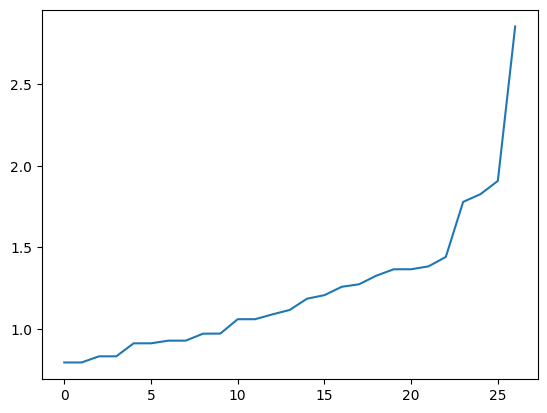

In [5]:
# to find optimal parameters (eps)
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(scaled_X)
distances, indices = nbrs.kneighbors(scaled_X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [10]:
# iterate to get the best shilouette_scores 
eps_list = np.arange(1.2, 2.5, 0.1)
min_samples = range(1,5)
from sklearn.metrics import silhouette_score


scores = []
for ms in min_samples:
    for eps in eps_list:
        model = DBSCAN(eps=eps, min_samples=ms).fit(scaled_X)
        score = silhouette_score(scaled_X, model.labels_)
        scores.append((ms, eps, score))
    

# get the parameters for best silouette score
min_samples, eps, score = sorted(scores, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.5233383840732929
min_samples: 4
eps: 2.4000000000000012


In [11]:
# choose 2.4 as eps and 5 as min_samples
eps = 2.4
model = DBSCAN(eps=eps, min_samples=5).fit(scaled_X)
df['cluster'] = model.labels_

df


,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,PrgP_Conceded,cluster
0,Arsenal,0,56.700000,62.750000,46.500000,839.000000,1874.500000,46.000000,31.250000,670.750000,1252.750000,0
1,Aston Villa,1,46.300000,46.000000,35.000000,634.000000,1333.500000,55.500000,37.000000,782.000000,1686.000000,0
2,Bournemouth,2,46.366667,46.000000,34.333333,680.333333,1405.666667,64.000000,45.666667,728.000000,1670.000000,0
3,Brighton,3,47.350000,35.500000,24.250000,588.000000,1392.750000,51.250000,36.750000,758.500000,1572.500000,0
4,Burnley,4,42.225000,37.750000,27.000000,419.500000,1009.250000,51.250000,39.250000,881.000000,1625.500000,0
5,Cardiff City,5,35.400000,33.000000,20.000000,434.000000,918.000000,69.000000,53.000000,872.000000,1723.000000,0
6,Chelsea,6,59.950000,61.500000,44.500000,995.250000,1962.000000,40.250000,29.500000,511.000000,1185.000000,0
7,Crystal Palace,7,43.950000,40.000000,27.000000,655.000000,1280.250000,54.750000,39.500000,751.500000,1778.750000,0
8,Everton,8,48.100000,45.500000,31.000000,600.250000,1339.000000,50.500000,36.750000,716.500000,1509.250000,0
9,Fulham,9,49.250000,29.500000,21.000000,677.500000,1420.500000,65.500000,46.500000,687.500000,1521.500000,0


In [ ]:
# DBSCAN does not work very well.
# so change the features.

In [12]:
# standard scaler
from sklearn.preprocessing import StandardScaler

features = ['Poss','Gls', 'Gls_Conceded']
# features = ['Poss','Gls','Ast','PrgC','PrgP','Gls_Conceded','Ast_Conceded','PrgC_Conceded','PrgP_Conceded']

X = np.array(df[features])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[ 1.07883685,  0.96937386, -0.64016218],
       [-0.34798184, -0.01782673,  0.23054891],
       [-0.33883556, -0.01782673,  1.00960619],
       [-0.20392803, -0.63666889, -0.15897974],
       [-0.90704781, -0.50405986, -0.15897974],
       [-1.84339758, -0.78401226,  1.46787518],
       [ 1.52471769,  0.89570218, -1.16717151],
       [-0.67038798, -0.37145082,  0.16180856],
       [-0.10103245, -0.0472954 , -0.22772008],
       [ 0.05674077, -0.99029298,  1.14708688],
       [-0.32740272, -1.37338575,  1.19291378],
       [ 1.16115332,  0.80729615, -0.09023939],
       [ 0.51291117,  0.65995278, -0.43394113],
       [ 1.77509693,  1.92710578, -1.78583465],
       [ 2.51251525,  2.81116601, -2.26701709],
       [ 0.87647555,  1.20512326, -1.32756566],
       [-1.21573455, -0.35671648, -0.13606629],
       [ 0.06360048, -1.25551105,  1.74283657],
       [-0.88303885, -1.10816768, -0.31937388],
       [ 0.00872284, -0.10623275,  0.73464479],
       [-1.02023295, -0.72507491,  1.192

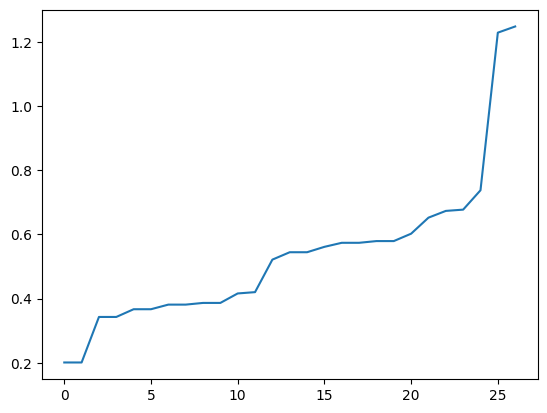

In [13]:
# to find optimal parameters (eps)
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(scaled_X)
distances, indices = nbrs.kneighbors(scaled_X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [23]:
min_samples = [1]
eps = np.arange(0.6, 0.9, 0.05) # returns array of ranging from 0.05 to 0.13 with step of 0.01

output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(scaled_X).labels_
        score = silhouette_score(scaled_X, labels)
        output.append((ms, ep, score))

In [24]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.37753334408152345
min_samples: 1
eps: 0.9000000000000002


In [26]:
# choose 0.9 as eps and 1 as min_samples
eps = 0.9
ms = 1
model = DBSCAN(eps=eps, min_samples=ms).fit(scaled_X)
df['cluster'] = model.labels_
df


,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,PrgP_Conceded,cluster
0,Arsenal,0,56.700000,62.750000,46.500000,839.000000,1874.500000,46.000000,31.250000,670.750000,1252.750000,0
1,Aston Villa,1,46.300000,46.000000,35.000000,634.000000,1333.500000,55.500000,37.000000,782.000000,1686.000000,1
2,Bournemouth,2,46.366667,46.000000,34.333333,680.333333,1405.666667,64.000000,45.666667,728.000000,1670.000000,1
3,Brighton,3,47.350000,35.500000,24.250000,588.000000,1392.750000,51.250000,36.750000,758.500000,1572.500000,1
4,Burnley,4,42.225000,37.750000,27.000000,419.500000,1009.250000,51.250000,39.250000,881.000000,1625.500000,1
5,Cardiff City,5,35.400000,33.000000,20.000000,434.000000,918.000000,69.000000,53.000000,872.000000,1723.000000,2
6,Chelsea,6,59.950000,61.500000,44.500000,995.250000,1962.000000,40.250000,29.500000,511.000000,1185.000000,0
7,Crystal Palace,7,43.950000,40.000000,27.000000,655.000000,1280.250000,54.750000,39.500000,751.500000,1778.750000,1
8,Everton,8,48.100000,45.500000,31.000000,600.250000,1339.000000,50.500000,36.750000,716.500000,1509.250000,1
9,Fulham,9,49.250000,29.500000,21.000000,677.500000,1420.500000,65.500000,46.500000,687.500000,1521.500000,3


In [27]:
from collections import Counter
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(model.labels_)[-1]}")
print(f"Silhouette_score: {silhouette_score(scaled_X, labels)}")

Number of clusters: 6
Number of outliers: 0
Silhouette_score: 0.37753334408152345


In [28]:
df.to_csv('../datasets/labeled_after_clustering/dbscan/team_stats_with_label.csv')

In [29]:
OPTIMAL_N_CLUSTERS = 6

In [30]:
# interpretation
# To evaluate, we convert the unsupervised clustering problem into a One-vs-all supervised classification problem.
for i in range(OPTIMAL_N_CLUSTERS):
    mapper = {c: 1 if i == c else 0 for c in range(OPTIMAL_N_CLUSTERS)}
    df[f'cluster {i}'] = df['cluster'].map(mapper)
df

,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,PrgP_Conceded,cluster,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5
0,Arsenal,0,56.700000,62.750000,46.500000,839.000000,1874.500000,46.000000,31.250000,670.750000,1252.750000,0,1,0,0,0,0,0
1,Aston Villa,1,46.300000,46.000000,35.000000,634.000000,1333.500000,55.500000,37.000000,782.000000,1686.000000,1,0,1,0,0,0,0
2,Bournemouth,2,46.366667,46.000000,34.333333,680.333333,1405.666667,64.000000,45.666667,728.000000,1670.000000,1,0,1,0,0,0,0
3,Brighton,3,47.350000,35.500000,24.250000,588.000000,1392.750000,51.250000,36.750000,758.500000,1572.500000,1,0,1,0,0,0,0
4,Burnley,4,42.225000,37.750000,27.000000,419.500000,1009.250000,51.250000,39.250000,881.000000,1625.500000,1,0,1,0,0,0,0
5,Cardiff City,5,35.400000,33.000000,20.000000,434.000000,918.000000,69.000000,53.000000,872.000000,1723.000000,2,0,0,1,0,0,0
6,Chelsea,6,59.950000,61.500000,44.500000,995.250000,1962.000000,40.250000,29.500000,511.000000,1185.000000,0,1,0,0,0,0,0
7,Crystal Palace,7,43.950000,40.000000,27.000000,655.000000,1280.250000,54.750000,39.500000,751.500000,1778.750000,1,0,1,0,0,0,0
8,Everton,8,48.100000,45.500000,31.000000,600.250000,1339.000000,50.500000,36.750000,716.500000,1509.250000,1,0,1,0,0,0,0
9,Fulham,9,49.250000,29.500000,21.000000,677.500000,1420.500000,65.500000,46.500000,687.500000,1521.500000,3,0,0,0,1,0,0


In [33]:


features = ['Poss','Gls', 'Gls_Conceded']

# train a classifier and get feature importances
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
feature_importances = []
feature_columns = ['cluster','feature_name','feature_importance']
df_fi = pd.DataFrame(columns=feature_columns)
for i in range(OPTIMAL_N_CLUSTERS):
    clf.fit(df[features].values, df[f"cluster {i}"].values)
    
    # Index sort the most important features
    sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

    # Get the most important features names and weights
    most_important_features = np.take_along_axis(
        np.array(features), 
        sorted_feature_weight_idxes, axis=0)
    most_important_weights = np.take_along_axis(
        np.array(clf.feature_importances_), 
        sorted_feature_weight_idxes, axis=0)
    

    # Show
    feature_importances.append(list(zip([i for j in range(len(most_important_weights))], most_important_features, most_important_weights)))
    df_fi_cluster = pd.DataFrame(columns=feature_columns, data=list(zip([i for j in range(len(most_important_weights))], most_important_features, most_important_weights)))
    df_fi = pd.concat([df_fi, df_fi_cluster])
    
feature_importances


[[(0, 'Gls', 0.3803059056498133),
  (0, 'Poss', 0.37894224315888236),
  (0, 'Gls_Conceded', 0.24075185119130427)],
 [(1, 'Poss', 0.3688128734413057),
  (1, 'Gls', 0.3510159033476803),
  (1, 'Gls_Conceded', 0.2801712232110141)],
 [(2, 'Poss', 0.532495277340577),
  (2, 'Gls', 0.2579957595917622),
  (2, 'Gls_Conceded', 0.20950896306766073)],
 [(3, 'Gls', 0.4703115950763963),
  (3, 'Gls_Conceded', 0.3347885028632574),
  (3, 'Poss', 0.19489990206034621)],
 [(4, 'Gls', 0.44666232073011736),
  (4, 'Poss', 0.29902705345501956),
  (4, 'Gls_Conceded', 0.25431062581486313)],
 [(5, 'Poss', 0.36666666666666664),
  (5, 'Gls', 0.3333333333333333),
  (5, 'Gls_Conceded', 0.3)]]

In [34]:
# visualize feature importance
import altair as alt

alt.Chart(df_fi).mark_rect().encode(
    x='cluster:O',
    y='feature_name:N',
    color='feature_importance:Q'
).properties(
    width=800,
    height=800
).configure_axis(
    labelFontSize=20
)

alt.Chart(...)

In [36]:
final_chart = alt.vconcat()
row_chart = alt.hconcat()

for i in range(OPTIMAL_N_CLUSTERS):
    df_cluster = df_fi[df_fi['cluster'] == i]
    base = alt.Chart(df_cluster, title=f'Cluster {i}').encode(
        x='feature_importance:Q',
        y=alt.Y('feature_name:N').sort('-x'),
        text=alt.Text('feature_importance:Q', format=".3"),
        color=alt.condition(
            alt.datum.feature_importance > 0.3,
            alt.value("orange"),
            alt.value('skyblue')
        )
    )

    bar = base.mark_bar().properties(
        width=200,
        height=800,
    )

    text = base.mark_text(align='left', dx=2)

    chart = (bar + text)
    if i == 0 :
        row_chart = chart
    elif i == 4:
        final_chart = alt.vconcat(final_chart, row_chart) 
        row_chart = chart
    else :
        row_chart = alt.hconcat(row_chart, chart)

final_chart = alt.vconcat(final_chart, row_chart)
    
final_chart.configure_title(
        fontSize=24,
    ).configure_axis(
        labelFontSize=20,
        titleFontSize=24,
    ).configure_text(
        fontSize=20
    )

alt.VConcatChart(...)

In [37]:
## add 2022 standings to original data frame
df_standing = pd.read_csv('../datasets/normalized/unsupervised_learning/2022_team_standing.csv')
final_df = df.merge(df_standing, on='Team', how='left')
final_df

,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,...,cluster 2,cluster 3,cluster 4,cluster 5,final_standing_2022,final_point_2022,champions,europa,europa_conference,relegation
0,Arsenal,0,56.700000,62.750000,46.500000,839.000000,1874.500000,46.000000,31.250000,670.750000,...,0,0,0,0,5.0,69.0,0.0,1.0,0.0,0.0
1,Aston Villa,1,46.300000,46.000000,35.000000,634.000000,1333.500000,55.500000,37.000000,782.000000,...,0,0,0,0,14.0,45.0,0.0,0.0,0.0,0.0
2,Bournemouth,2,46.366667,46.000000,34.333333,680.333333,1405.666667,64.000000,45.666667,728.000000,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Brighton,3,47.350000,35.500000,24.250000,588.000000,1392.750000,51.250000,36.750000,758.500000,...,0,0,0,0,9.0,51.0,0.0,0.0,0.0,0.0
4,Burnley,4,42.225000,37.750000,27.000000,419.500000,1009.250000,51.250000,39.250000,881.000000,...,0,0,0,0,18.0,35.0,0.0,0.0,0.0,1.0
5,Cardiff City,5,35.400000,33.000000,20.000000,434.000000,918.000000,69.000000,53.000000,872.000000,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,Chelsea,6,59.950000,61.500000,44.500000,995.250000,1962.000000,40.250000,29.500000,511.000000,...,0,0,0,0,3.0,74.0,1.0,0.0,0.0,0.0
7,Crystal Palace,7,43.950000,40.000000,27.000000,655.000000,1280.250000,54.750000,39.500000,751.500000,...,0,0,0,0,12.0,48.0,0.0,0.0,0.0,0.0
8,Everton,8,48.100000,45.500000,31.000000,600.250000,1339.000000,50.500000,36.750000,716.500000,...,0,0,0,0,16.0,39.0,0.0,0.0,0.0,0.0
9,Fulham,9,49.250000,29.500000,21.000000,677.500000,1420.500000,65.500000,46.500000,687.500000,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_to_viz = final_df.replace(np.NaN, -1)
df_to_viz

,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,...,cluster 2,cluster 3,cluster 4,cluster 5,final_standing_2022,final_point_2022,champions,europa,europa_conference,relegation
0,Arsenal,0,56.700000,62.750000,46.500000,839.000000,1874.500000,46.000000,31.250000,670.750000,...,0,0,0,0,5.0,69.0,0.0,1.0,0.0,0.0
1,Aston Villa,1,46.300000,46.000000,35.000000,634.000000,1333.500000,55.500000,37.000000,782.000000,...,0,0,0,0,14.0,45.0,0.0,0.0,0.0,0.0
2,Bournemouth,2,46.366667,46.000000,34.333333,680.333333,1405.666667,64.000000,45.666667,728.000000,...,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,Brighton,3,47.350000,35.500000,24.250000,588.000000,1392.750000,51.250000,36.750000,758.500000,...,0,0,0,0,9.0,51.0,0.0,0.0,0.0,0.0
4,Burnley,4,42.225000,37.750000,27.000000,419.500000,1009.250000,51.250000,39.250000,881.000000,...,0,0,0,0,18.0,35.0,0.0,0.0,0.0,1.0
5,Cardiff City,5,35.400000,33.000000,20.000000,434.000000,918.000000,69.000000,53.000000,872.000000,...,1,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,Chelsea,6,59.950000,61.500000,44.500000,995.250000,1962.000000,40.250000,29.500000,511.000000,...,0,0,0,0,3.0,74.0,1.0,0.0,0.0,0.0
7,Crystal Palace,7,43.950000,40.000000,27.000000,655.000000,1280.250000,54.750000,39.500000,751.500000,...,0,0,0,0,12.0,48.0,0.0,0.0,0.0,0.0
8,Everton,8,48.100000,45.500000,31.000000,600.250000,1339.000000,50.500000,36.750000,716.500000,...,0,0,0,0,16.0,39.0,0.0,0.0,0.0,0.0
9,Fulham,9,49.250000,29.500000,21.000000,677.500000,1420.500000,65.500000,46.500000,687.500000,...,0,1,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [39]:
def get_tournament_type(row):
    if row['champions'] == 1:
        return 'UEFA Champions'
    if row['europa'] == 1:
        return 'EUROPA League'
    if row['europa_conference'] == 1:
        return 'EUROPA Conference'
    if row['relegation'] == 1:
        return 'Relegated next season'
    if row['relegation'] == -1:
        return 'Relegated before this season'
    return 'N/A'
    
df_to_viz['tournament_type'] = df_to_viz.apply(lambda x : get_tournament_type(x), axis=1)

In [40]:
df_to_viz

,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,...,cluster 3,cluster 4,cluster 5,final_standing_2022,final_point_2022,champions,europa,europa_conference,relegation,tournament_type
0,Arsenal,0,56.700000,62.750000,46.500000,839.000000,1874.500000,46.000000,31.250000,670.750000,...,0,0,0,5.0,69.0,0.0,1.0,0.0,0.0,EUROPA League
1,Aston Villa,1,46.300000,46.000000,35.000000,634.000000,1333.500000,55.500000,37.000000,782.000000,...,0,0,0,14.0,45.0,0.0,0.0,0.0,0.0,N/A
2,Bournemouth,2,46.366667,46.000000,34.333333,680.333333,1405.666667,64.000000,45.666667,728.000000,...,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Relegated before this season
3,Brighton,3,47.350000,35.500000,24.250000,588.000000,1392.750000,51.250000,36.750000,758.500000,...,0,0,0,9.0,51.0,0.0,0.0,0.0,0.0,N/A
4,Burnley,4,42.225000,37.750000,27.000000,419.500000,1009.250000,51.250000,39.250000,881.000000,...,0,0,0,18.0,35.0,0.0,0.0,0.0,1.0,Relegated next season
5,Cardiff City,5,35.400000,33.000000,20.000000,434.000000,918.000000,69.000000,53.000000,872.000000,...,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Relegated before this season
6,Chelsea,6,59.950000,61.500000,44.500000,995.250000,1962.000000,40.250000,29.500000,511.000000,...,0,0,0,3.0,74.0,1.0,0.0,0.0,0.0,UEFA Champions
7,Crystal Palace,7,43.950000,40.000000,27.000000,655.000000,1280.250000,54.750000,39.500000,751.500000,...,0,0,0,12.0,48.0,0.0,0.0,0.0,0.0,N/A
8,Everton,8,48.100000,45.500000,31.000000,600.250000,1339.000000,50.500000,36.750000,716.500000,...,0,0,0,16.0,39.0,0.0,0.0,0.0,0.0,N/A
9,Fulham,9,49.250000,29.500000,21.000000,677.500000,1420.500000,65.500000,46.500000,687.500000,...,1,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Relegated before this season


In [41]:
# to check the each cluster's characteristics
palette = alt.Scale(domain=['UEFA Champions', 'EUROPA League', 'EUROPA Conference', 'N/A', 'Relegated next season', 'Relegated before this season'],
                  range=['darkblue', 'blue', 'lightblue', 'grey', 'orange', 'tomato'])

alt.Chart(df_to_viz).mark_bar().encode(
    x=alt.X('count(Team)').stack("normalize"),
    y='cluster:N',
    color=alt.Color('tournament_type:N', scale=palette),
).properties(
    width=600,
    height=300,
    title='The proportion of the tournament type per cluster'
).configure_title(
        fontSize=24,
).configure_axis(
    labelFontSize=20,
    titleFontSize=24,
).configure_text(
    fontSize=20
).configure_legend(
    titleFontSize=18,
    labelFontSize=15
) 

alt.Chart(...)

In [46]:
df_to_viz[df_to_viz['cluster']==1]

,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,...,cluster 3,cluster 4,cluster 5,final_standing_2022,final_point_2022,champions,europa,europa_conference,relegation,tournament_type
1,Aston Villa,1,46.300000,46.000000,35.000000,634.000000,1333.500000,55.500000,37.000000,782.000000,...,0,0,0,14.0,45.0,0.0,0.0,0.0,0.0,N/A
2,Bournemouth,2,46.366667,46.000000,34.333333,680.333333,1405.666667,64.000000,45.666667,728.000000,...,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Relegated before this season
3,Brighton,3,47.350000,35.500000,24.250000,588.000000,1392.750000,51.250000,36.750000,758.500000,...,0,0,0,9.0,51.0,0.0,0.0,0.0,0.0,N/A
4,Burnley,4,42.225000,37.750000,27.000000,419.500000,1009.250000,51.250000,39.250000,881.000000,...,0,0,0,18.0,35.0,0.0,0.0,0.0,1.0,Relegated next season
7,Crystal Palace,7,43.950000,40.000000,27.000000,655.000000,1280.250000,54.750000,39.500000,751.500000,...,0,0,0,12.0,48.0,0.0,0.0,0.0,0.0,N/A
8,Everton,8,48.100000,45.500000,31.000000,600.250000,1339.000000,50.500000,36.750000,716.500000,...,0,0,0,16.0,39.0,0.0,0.0,0.0,0.0,N/A
16,Newcastle Utd,16,39.975000,40.250000,29.250000,504.750000,969.250000,51.500000,35.750000,788.750000,...,0,0,0,11.0,49.0,0.0,0.0,0.0,0.0,N/A
18,Sheffield Utd,18,42.400000,27.500000,19.000000,492.000000,1274.000000,49.500000,36.500000,834.000000,...,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Relegated before this season
19,Southampton,19,48.900000,44.500000,28.750000,637.750000,1368.000000,61.000000,44.250000,642.750000,...,0,0,0,15.0,40.0,0.0,0.0,0.0,0.0,N/A
21,Swansea City,21,45.300000,27.000000,20.000000,596.000000,1194.000000,54.000000,37.000000,765.000000,...,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Relegated before this season


In [ ]:
# Cluster 4 and 5 are the strongest teams.
# Cluster 2 and 3 are the most weak teams.

In [47]:
# to plot the final points distribution per cluster
alt.Chart(df_to_viz).mark_boxplot(color="tomato").encode(
    x=alt.X('cluster:N'),
    y=alt.Y('final_point_2022:Q', scale=alt.Scale(zero=False))
).properties(
    width=600,
    height=400,
    title="Distribution of final_point per cluster"
).configure_title(
        fontSize=24,
).configure_axis(
    labelFontSize=20,
    titleFontSize=24,
).configure_text(
    fontSize=20
)

alt.Chart(...)


*--- PCA Report ---*

X mean:		0.000
X variance:	1.000
...Assuming data is properly scaled...

 -- Summary --
You can reduce from 3 to 2 dimensions while retaining 95% of variance.
2 principal components explain 95.50% of variance.
3 principal components explain 100.00% of variance.
X*X_pca: (3, 27) * (27, 3) = (3, 3)


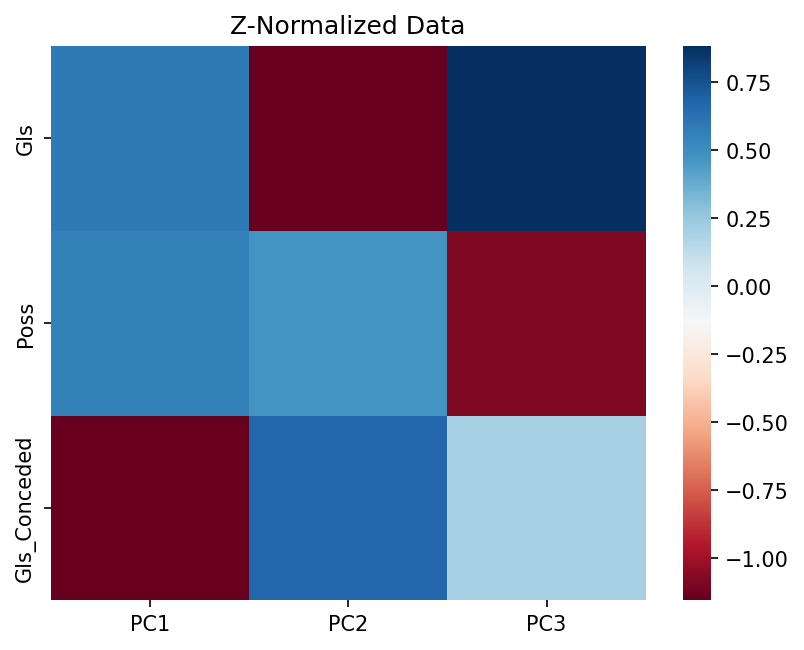

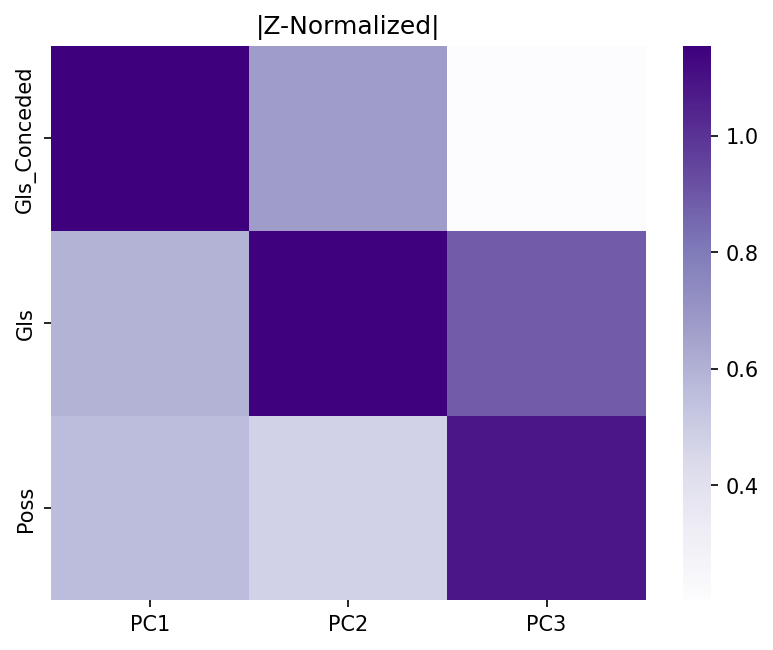

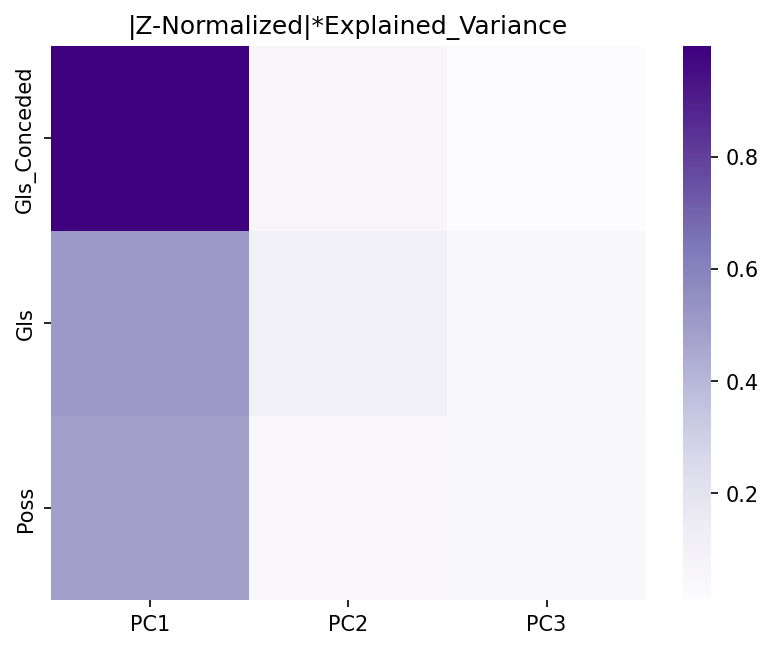

        score_      feature_
rank                        
1     1.067427  Gls_Conceded
2     0.657257           Gls
3     0.577214          Poss


(           variance_cumulative  variance
 dimension                               
 1                     0.863511  0.863511
 2                     0.954791  0.091280
 3                     1.000000  0.045209,
 array([[ 1.55468503,  0.30847164,  0.03437943],
        [-0.34020484, -0.06297466,  0.2342153 ],
        [-0.7764978 ,  0.52035428,  0.51060218],
        [-0.40416724, -0.29450567, -0.47130003],
        [-0.72753469, -0.75620403, -0.0305839 ],
        [-2.35098862, -0.19464123,  0.77615377],
        [ 2.06460651,  0.21144867, -0.42664413],
        [-0.69535847, -0.35188848,  0.07892312],
        [ 0.04323452, -0.23927003, -0.07198246],
        [-1.2050879 ,  0.82503753, -0.40839229],
        [-1.67795201,  0.57786192, -0.51669807],
        [ 1.19394609,  0.76067671,  0.06333187],
        [ 0.93068109,  0.06326565,  0.12942417],
        [ 3.17020718, -0.01412533,  0.05914466],
        [ 4.38896868,  0.17845422,  0.24466639],
        [ 1.96840179, -0.32118552,  0.0720853 ],
     

In [48]:
# PCA analysis
from pca_analyzer import *

pca_full_report(X=scaled_X, features_=features)

In [49]:
# PCA to visualize
from sklearn.decomposition import PCA 
pca_teams = PCA(n_components=2)
principalComponents_teams = pca_teams.fit_transform(scaled_X)

pca_df = pd.DataFrame(data = principalComponents_teams, columns = ['PCA 1', 'PCA 2'])
pca_df.reset_index(inplace=True)


In [50]:
final_df = pd.merge(df_to_viz, pca_df, on='index')

In [54]:
# visualize using altair
import altair as alt

alt.Chart(final_df).mark_circle(size=60).encode(
    x='PCA 1',
    y='PCA 2',
    color='cluster:N',
    tooltip=['Team', 'Gls', 'PCA 1', 'PCA 2', 'Poss', 'cluster']
).properties(
    width=600,
    height=400,
    title="The result of team clustering by DBSCAN method"
).configure_title(
        fontSize=24,
).configure_axis(
    labelFontSize=20,
    titleFontSize=24,
).configure_text(
    fontSize=20
).interactive()

alt.Chart(...)

In [53]:
# export csv file
final_df.to_csv(f'../datasets/labeled_after_clustering/dbscan/final_result_team.csv')